In [5]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


ip = '10.78.209.5'
port = 1521
SID = 'billdb5'
dsn_tns = cx_Oracle.makedsn(ip, port, SID)

connection = cx_Oracle.connect('sys', 'billorapwd', dsn_tns, mode=cx_Oracle.SYSDBA)

df = pd.read_sql("SELECT\
                                      wc.wait_class                    AS waitclass,\
                                      TRUNC(begin_time, 'MI')          AS sample_time,\
                                      round((wh.time_waited) / wh.intsize_csec, 3) AS DB_time\
                                    FROM V$SYSTEM_WAIT_CLASS wc,\
                                      v$waitclassmetric_history wh\
                                    WHERE wc.wait_class != 'Idle'\
                                          AND wc.wait_class_id = wh.wait_class_id\
                                    UNION\
                                    SELECT\
                                      'CPU'                   AS waitclass,\
                                      TRUNC(begin_time, 'MI') AS sample_time,\
                                      round(VALUE/100, 3)         AS DB_time\
                                    FROM v$sysmetric_history\
                                    WHERE GROUP_ID = 2\
                                          AND metric_name = 'CPU Usage Per Sec'\
                                    ORDER by sample_time, waitclass",
                                   connection)



        WAITCLASS         SAMPLE_TIME  DB_TIME
0  Administrative 2017-11-17 11:53:00    0.000
1     Application 2017-11-17 11:53:00    0.000
2             CPU 2017-11-17 11:53:00    2.617
3          Commit 2017-11-17 11:53:00    0.000
4     Concurrency 2017-11-17 11:53:00    0.001
__________________________________________
WAITCLASS            Administrative  Application    CPU  Commit  Concurrency  \
SAMPLE_TIME                                                                    
2017-11-17 11:53:00             0.0          0.0  2.617     0.0        0.001   
2017-11-17 11:54:00             0.0          0.0  2.548     0.0        0.001   
2017-11-17 11:55:00             0.0          0.0  2.496     0.0        0.001   
2017-11-17 11:56:00             0.0          0.0  2.593     0.0        0.000   
2017-11-17 11:57:00             0.0          0.0  2.622     0.0        0.001   

WAITCLASS            Configuration  Network  Other  Scheduler  System I/O  \
SAMPLE_TIME                          

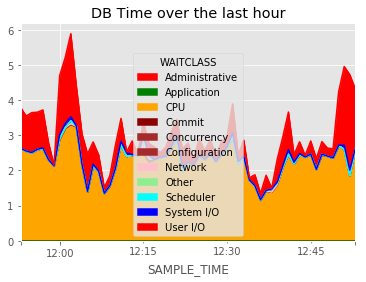

In [9]:
style.use('ggplot')
 
print(df.head())
print("__________________________________________")
 
pdf = df.pivot(index='SAMPLE_TIME', columns='WAITCLASS', values='DB_TIME')
 
print (pdf.head())
print("__________________________________________")
 
pdf.plot(kind='area', stacked=True, title='DB Time over the last hour', color=['red', 'green', 'orange', 'darkred', 'brown', 'brown', 'pink', 'lightgreen', 'cyan', 'blue'])
plt.show()

In [7]:
pdf.plot?
